In [ ]:
# 1. Main Project intro (All this information is taken from the assignment)

# XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry.
# As per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# Business Problem
# Which company, Pink cab or Yellow cab, is a better investment?

# Before choosing the problem above described, a little research has been conducted in order to decide the following items:

#     Which company has maximum cab users at a particular time period?

#     Does margin proportionally increase with increase in number of customers?

#     What are the attributes of these customer segments?These questions will be answered in the following section.


# 2. Data sets used:

#     Cab_Data.csv – this file includes details of transaction for 2 cab companies

#     Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

#     Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

#     City.csv – this file contains list of US cities, their population and number of cab users

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive 

In [ ]:
drive.mount('/gdrive', force_remount=True) 

Mounted at /gdrive


In [ ]:
# The date format has already been changed in excel and saved as a new file
cabdata_df = pd.read_csv('/gdrive/My Drive/Main_withdates_Cab_Data.csv', sep=',')
cabdata_df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [ ]:
#Data types of the cab_data file
cabdata_df.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [ ]:
cabdata_df['Date of Travel'] = pd.to_datetime(cabdata_df['Date of Travel'])
cabdata_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [ ]:
cabdata_df['Date of Travel'] = cabdata_df['Date of Travel'].dt.strftime('%Y/%m/%d')

In [ ]:
#Read the first 2 lines of cab
cabdata_df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [ ]:
# Import the customerID file 
customerID_df = pd.read_csv('/gdrive/My Drive/Customer_ID.csv', sep=',')
customerID_df.head(4)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327


In [ ]:
#Data types of the customer file
customerID_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [ ]:
# Import the city file 
city_df = pd.read_csv('/gdrive/My Drive/City.csv', sep=',')
city_df.head(4)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"


In [ ]:
# Import the transactionID file 
transactionID_df = pd.read_csv('/gdrive/My Drive/Transaction_ID.csv', sep=',')
transactionID_df.head(4)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash


In [ ]:
# Merge both cab data file and the transaction ID file through transaction ID, name is Merge_table_1
Merge_table_1=pd.merge(cabdata_df,transactionID_df, on="Transaction ID")
Merge_table_1.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card


In [ ]:
# Now merge Merge_table_1 with customerID_df and name it Merge_table_2
Merge_table_2=pd.merge(Merge_table_1,customerID_df, on="Customer ID")
Merge_table_2.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018/07/21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813


In [ ]:
# Now merge Merge_table_2 with city_df and name it Merge_table_3
Merge_table_3=pd.merge(Merge_table_2,city_df, on="City")
Merge_table_3.head(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018/07/21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018/11/23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"


In [ ]:
# Now we have Merge_table_3 with all the datasets merged together into one 

In [ ]:
Merge_table_3.shape 

(359392, 15)

In [ ]:
#Calculating the profit per trip 
Merge_table_3["Profit"]=Merge_table_3["Price Charged"]-Merge_table_3["Cost of Trip"]
Merge_table_3.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150
1,10351127,2018/07/21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772


In [ ]:
Merge_table_3.shape

(359392, 15)

In [ ]:
#Create and export a new csv file
Merge_table_3.to_csv("Merged_table.csv")

In [ ]:
# Now we will start the Explanatory Data Analysis through creating a summary of statistics table to find the numerical attributes 
Merge_table_3.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000


In [ ]:
# Next we will find the missing values 
Merge_table_3.isnull().sum()


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit                0
dtype: int64

In [ ]:
# Find the null values 
Merge_table_3.isnull().values.any()

False

In [ ]:
# Find the duplicated values in the dataset Merge_table_3
Merge_table_3.duplicated(subset=None, keep='first')


0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

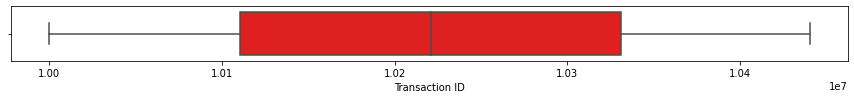

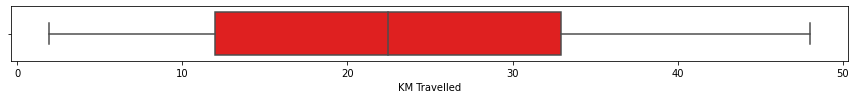

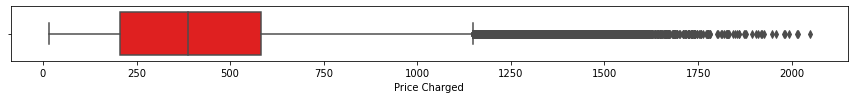

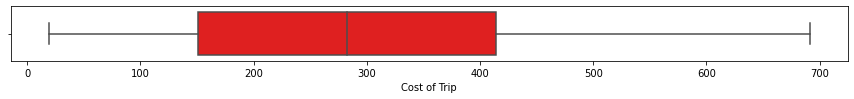

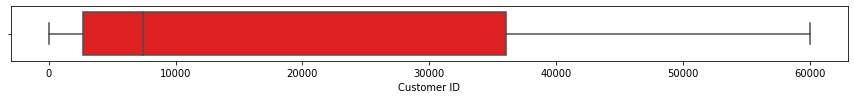

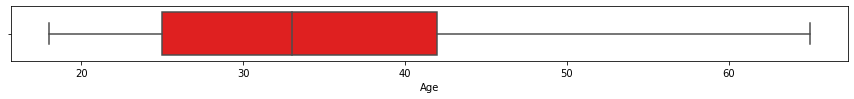

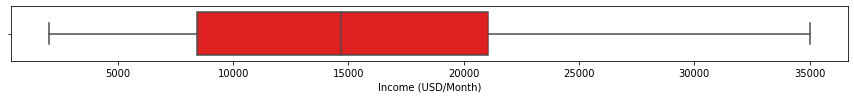

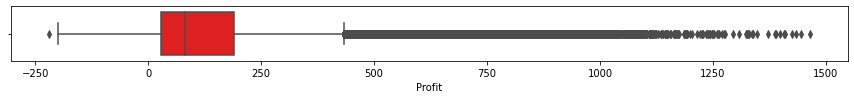

In [ ]:
# Finding the outliers with the help of a boxplot and IQR
Outlier_table=Merge_table_3.select_dtypes(exclude=['object'])
for column in Outlier_table:
  plt.figure(figsize=(15,1))
  sns.boxplot(data=Outlier_table, x=column, color="red")

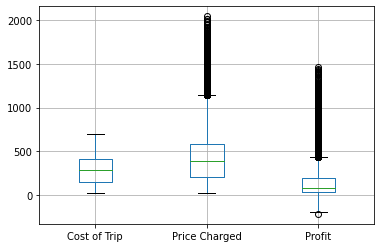

In [ ]:
# Boxplot for Price charged, Cost of Trip and Profit 
boxplot = Merge_table_3.boxplot(column=['Cost of Trip','Price Charged','Profit'])

In [ ]:
# Using year only for the date of travel
Merge_table_3['Year'] = pd.DatetimeIndex(Merge_table_3['Date of Travel']).year
Merge_table_3['Year'].head(2)

0    2016
1    2018
Name: Year, dtype: int64

In [ ]:
# Profit calculation 
profit_calculation = Merge_table_3.groupby(['Year','Company'])['Profit'].sum().reset_index(name='Profit Calculation')

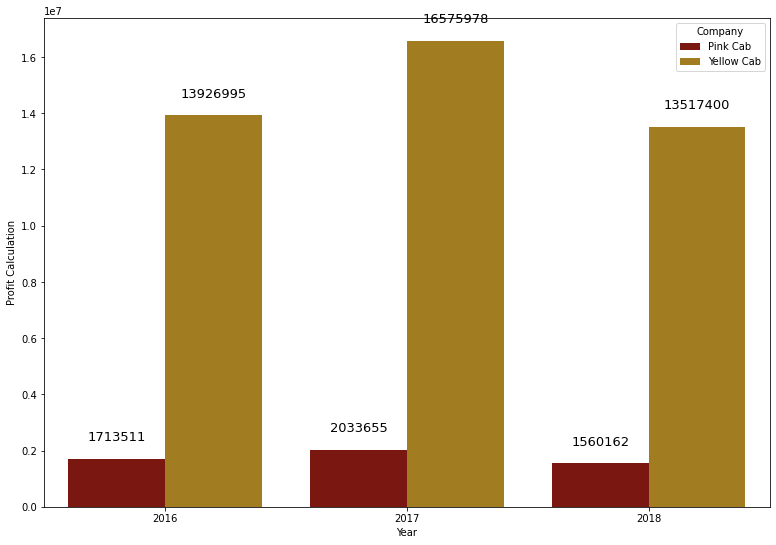

In [ ]:
# Histogram for profit by each year 
fig_dims = (13, 9)
fig, ax = plt.subplots(figsize=fig_dims)
Histogram_profit=profit_calculation
palette = sns.set_color_codes('dark')
chart = sns.barplot(x="Year", y='Profit Calculation', data=Histogram_profit, hue='Company', palette=['r','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='bottom', fontsize=13, color='black', xytext=(0, 15),
        textcoords='offset points')

In [ ]:
# Use groub by and count users
Total_usercount = Merge_table_3.groupby(['Year','Company'])['Users'].count().reset_index(name='User Count')

In [ ]:
#Transform Users column to float data type and replace comma with space
Merge_table_3['Users'].astype(str)

0           24,701 
1           24,701 
2           24,701 
3           24,701 
4           24,701 
            ...    
359387     127,001 
359388     127,001 
359389     127,001 
359390     127,001 
359391     127,001 
Name: Users, Length: 359392, dtype: object

In [ ]:
Merge_table_3['Users'] = Merge_table_3["Users"].str.replace(',','').astype(float)

In [ ]:
# Use groub by and count users
user_count1 = Merge_table_3.groupby(['Year','Company'])['Users'].count().reset_index(name='User Count')

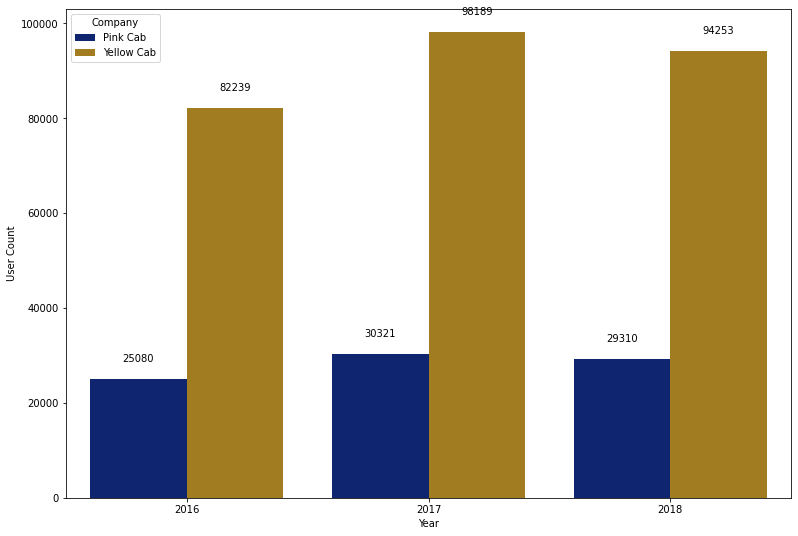

In [ ]:
#Plot Total users for each year and company
fig_dims = (13, 9)
fig, ax = plt.subplots(figsize=fig_dims)
Histogram_2016=user_count1
palette = sns.set_color_codes('dark')
chart = sns.barplot(x="Year", y='User Count', data=user_count1, hue='Company', palette=['b','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [ ]:
# Analyzing the above two charts, we can clearly see that the yellow cab company has a higher number of users as well as a higher profit in the year 2016

In [ ]:
# Profit calculation based on city and company in 2016
profit_calculation2 = Merge_table_3.groupby(['City','Company'])['Profit'].sum().reset_index(name='Profit Calculation')

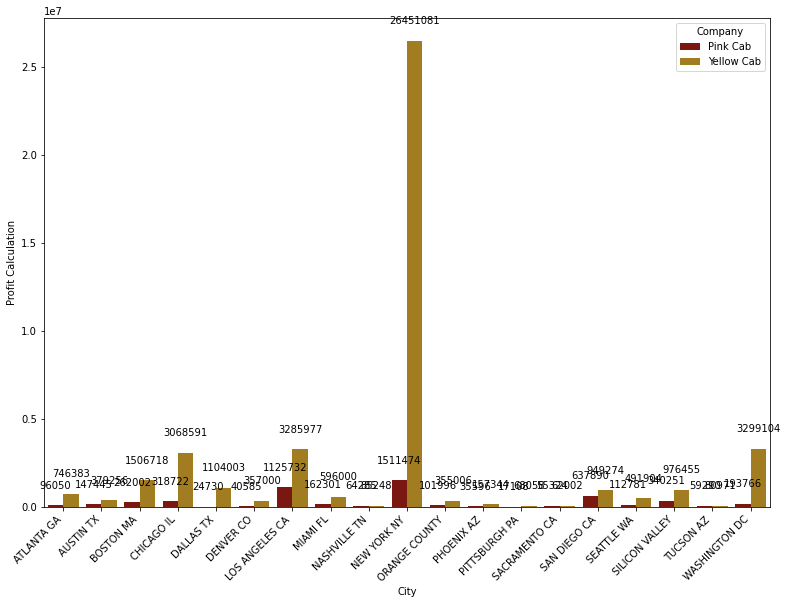

In [ ]:
#Plot histogram with profit for each city and company
fig_dims = (13, 9)
fig, ax = plt.subplots(figsize=fig_dims)
Histogram_2016=profit_calculation2
palette = sns.set_color_codes('dark')
chart = sns.barplot(x="City", y='Profit Calculation', data=profit_calculation2, hue='Company', palette=['r','y'])
plt.xticks(rotation=45, ha='right')

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [ ]:
# The above diagram shows that the profit within each city is also, on average, higher for the yellow cab when compared to the pink cab company

In [ ]:
# Profit calculation based on city and company in 2016 with users 
user_count2 = Merge_table_3.groupby(['City','Company'])['Users'].count().reset_index(name='User Count')

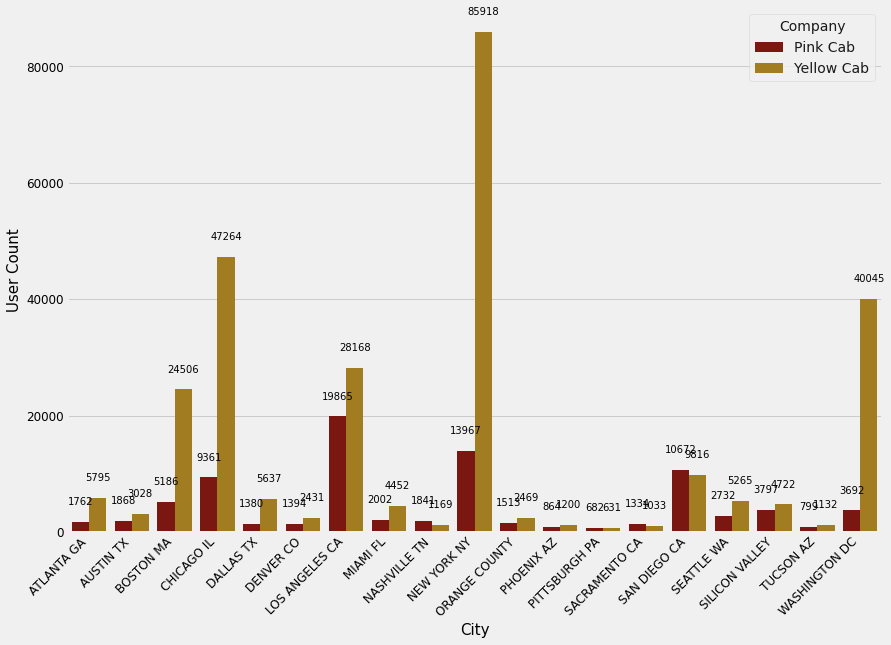

In [ ]:
#Plot histogram with users for each city and company
fig_dims = (13, 9)
fig, ax = plt.subplots(figsize=fig_dims)
Histogram_2016=user_count2
palette = sns.set_color_codes('dark')
chart = sns.barplot(x="City", y='User Count', data=user_count2, hue='Company', palette=['r','y'])
plt.xticks(rotation=45, ha='right')

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [ ]:
# Even each of the cities has high number of users for the yellow cab when compared to the pink cab

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
Merge_table_3.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885",24701.0,57.3150,2016
1,10351127,2018/07/21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885",24701.0,281.2772,2018
2,10412921,2018/11/23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885",24701.0,194.6480,2018
3,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885",24701.0,23.6660,2016
4,10320494,2018/04/21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885",24701.0,253.9808,2018


In [ ]:
# Label index for Pink cab
pink = Merge_table_3.loc[Merge_table_3['Company'] == 'Pink Cab']

In [ ]:
# To normalize the date of travel column
Merge_table_3['Date of Travel'] = pd.to_datetime(Merge_table_3['Date of Travel']
                                                 ).dt.normalize()
Merge_table_3.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                        float64
Profit                       float64
Year                           int64
dtype: object

In [ ]:
# Turn the column into index
pink = pink.set_index("Date of Travel")
pink.index

DatetimeIndex(['2016-01-08', '2016-01-06', '2018-10-27', '2016-01-02',
               '2016-01-07', '2016-10-27', '2018-05-11', '2016-01-03',
               '2016-01-07', '2016-09-04',
               ...
               '2017-11-24', '2018-07-27', '2017-11-02', '2018-07-14',
               '2018-12-04', '2017-07-23', '2017-11-19', '2018-12-02',
               '2017-07-23', '2017-11-27'],
              dtype='datetime64[ns]', name='Date of Travel', length=84711, freq=None)

In [ ]:
# Create y to measure the profit in pink cab
x = pink['Profit'].resample('m').sum()

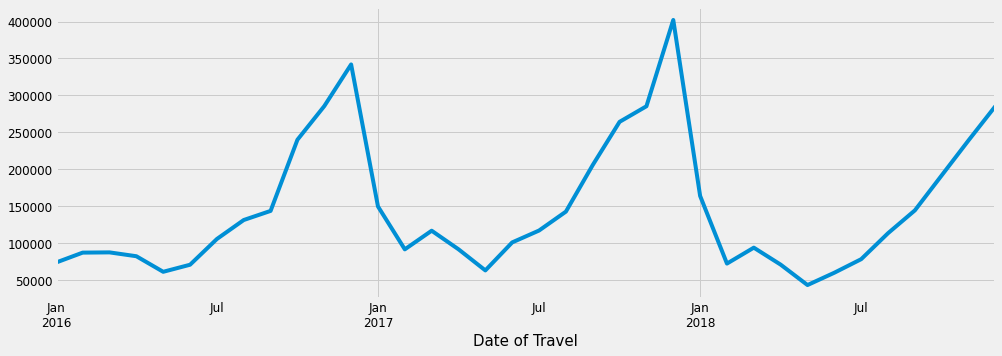

In [ ]:
# Plot the diagram
x.plot(figsize=(15, 5))
plt.show()

In [ ]:
# Label index for Yellow cab
yellow_cab = Merge_table_3.loc[Merge_table_3['Company'] == 'Yellow Cab']


In [ ]:
# To normalize the date of travel column
Merge_table_3['Date of Travel'] = pd.to_datetime(Merge_table_3['Date of Travel']).dt.normalize()
Merge_table_3.dtypes

index                          int64
Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                        float64
Profit                       float64
Year                           int64
dtype: object

In [ ]:
# Turn the column into index
yellow_cab = yellow_cab.set_index('Date of Travel')
yellow_cab.index

DatetimeIndex(['2018-07-21', '2018-11-23', '2018-04-21', '2018-05-04',
               '2016-09-21', '2017-06-23', '2018-04-21', '2017-01-27',
               '2016-11-06', '2017-06-03',
               ...
               '2018-10-04', '2017-12-06', '2018-03-15', '2018-01-02',
               '2017-12-17', '2018-03-03', '2018-04-13', '2018-07-06',
               '2018-08-02', '2018-08-30'],
              dtype='datetime64[ns]', name='Date of Travel', length=274681, freq=None)

In [ ]:
# Create y to measure the profit in yellow cab
y = yellow_cab['Profit'].resample('m').sum()

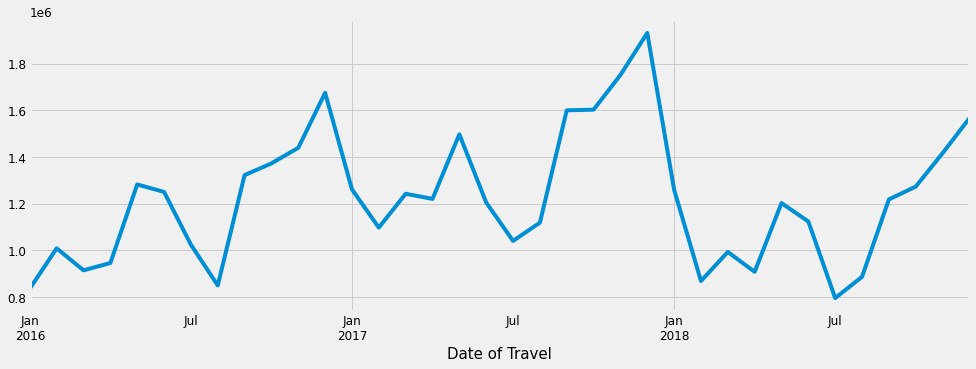

In [ ]:
# Plot the diagram
y.plot(figsize=(15, 5))
plt.show()

In [ ]:
#Profits based on agegroups 
bins= [18,22,35,50,100]
labels = ['18-22','23-35','36-50','50+']
Merge_table_3['Agegroup'] = pd.cut(Merge_table_3['Age'], bins=bins, labels=labels)
Total_profit3 = Merge_table_3.groupby(['Company','Agegroup'])['Profit'].sum().reset_index(name='Total profit')

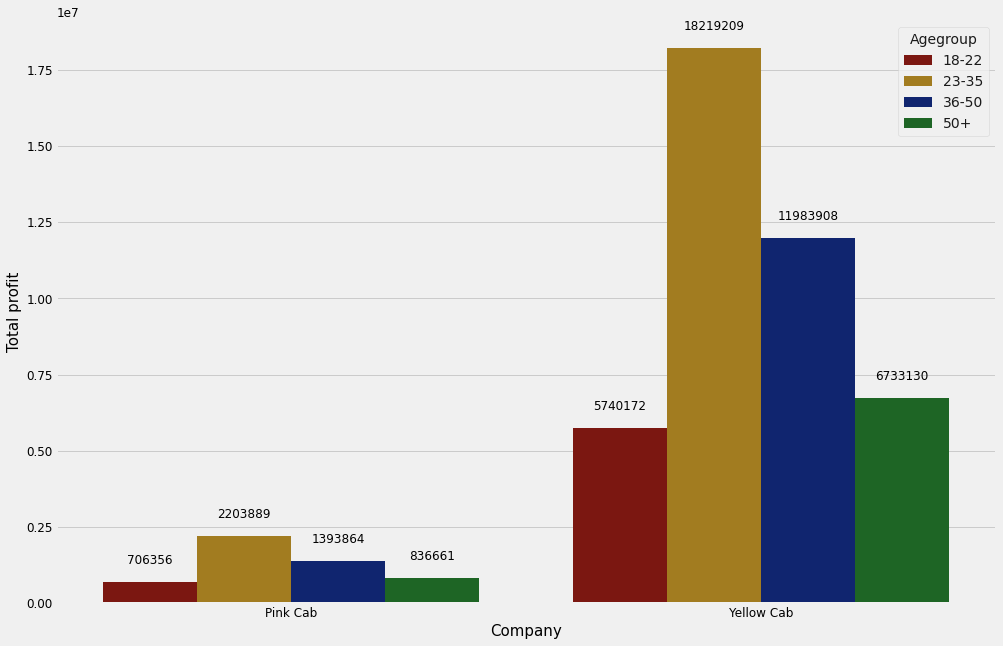

In [ ]:
#Plot Total profit for each company and agegroup 
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
Histogram_2016 = Total_profit3
palette = sns.set_color_codes('dark')
chart = sns.barplot(x="Company", y='Total profit', data=Histogram_2016, hue='Agegroup', palette=['r','y','b','g'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 15),
        textcoords='offset points')

In [ ]:
# Users based on agegroup
Total_users5 = Merge_table_3.groupby(['Company','Agegroup'])['Users'].sum().reset_index(name='User Count')

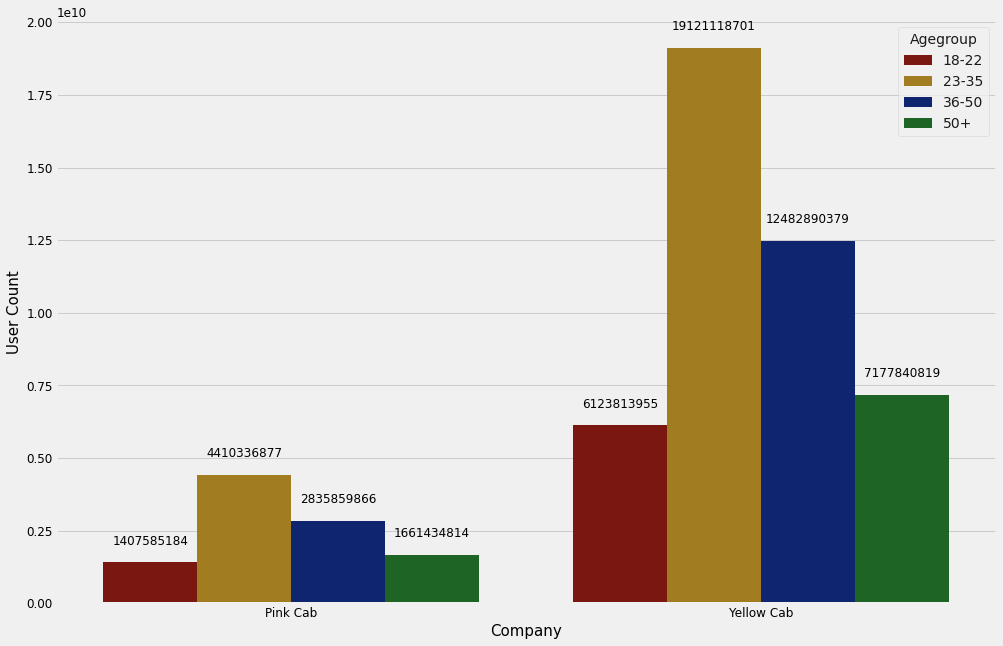

In [ ]:
#Plot Total users for each company and agegroup 
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
Histogram_2016 = Total_users5
palette = sns.set_color_codes('dark')
chart = sns.barplot(x="Company", y='User Count', data= Total_users5, hue='Agegroup', palette=['r','y','b','g'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 15),
        textcoords='offset points')

In [ ]:
# Profit calculation based on gender 
profit_gender = Merge_table_3.groupby(['Company','Gender'])['Profit'].sum().reset_index(name='Profit Calculation')

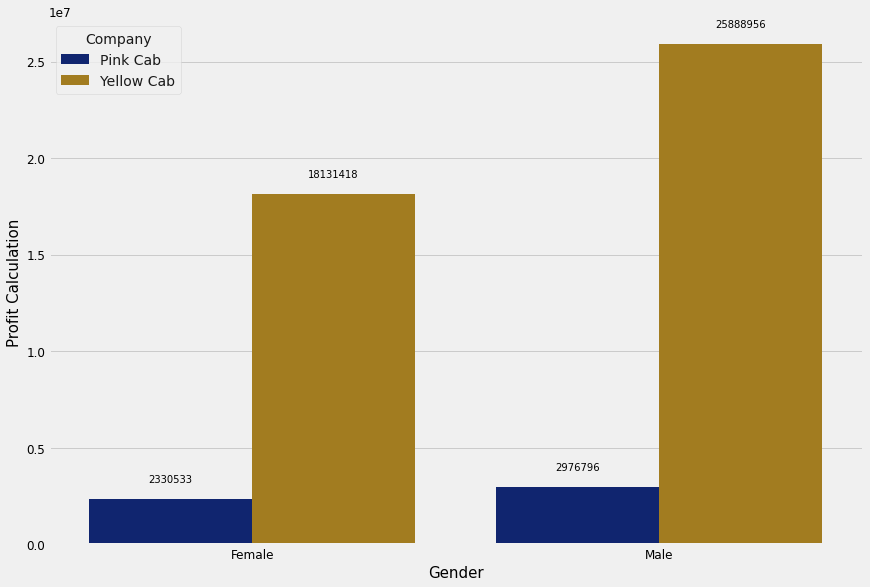

In [ ]:
#Plot histogram with users and profit for gender and company
fig_dims = (13, 9)
fig, ax = plt.subplots(figsize=fig_dims)
Histogram_2016=profit_gender
palette = sns.set_color_codes('dark')
chart = sns.barplot(x="Gender", y='Profit Calculation', data=profit_gender, hue='Company', palette=['b','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [ ]:
# Use groub by and count users
user_gender = Merge_table_3.groupby(['Gender','Company'])['Users'].count().reset_index(name='User Count')

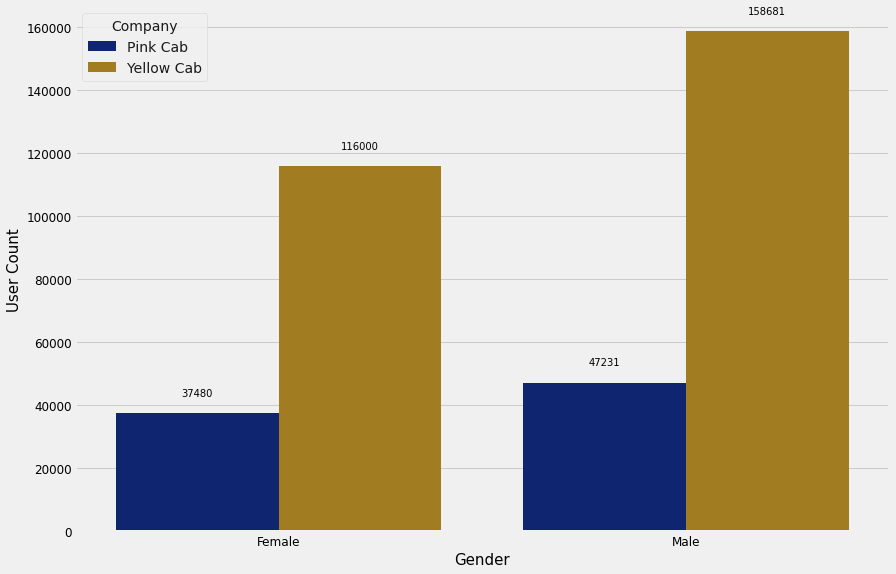

In [ ]:
#Plot Total users for each year and company based on gender
fig_dims = (13, 9)
fig, ax = plt.subplots(figsize=fig_dims)
Histogram_2016=user_gender
palette = sns.set_color_codes('dark')
chart = sns.barplot(x='Gender', y='User Count', data=user_gender, hue='Company', palette=['b','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')
    
 

In [ ]:
# Conclusion
# The above explanatory data analysis can affirm that a yellow cab is the company in which the XYZ firm should invest
# This is because:
 
# Yellow cab has a higher revenue in almost every city

# The number of yellow cab users are also much greater in each city 

# Therefore, the yellow cab company generates more profit per year than the other company.

# The future revenue for the yellow cab company is also higher than the pink company

# Therefore, XYZ firm should invest in Yellow Cab company